# K-means hierarchial

Hierarchical sampling from clusters: 100%|██████████| 8/8 [00:00<00:00, 15328.66it/s]
(1000, 2)


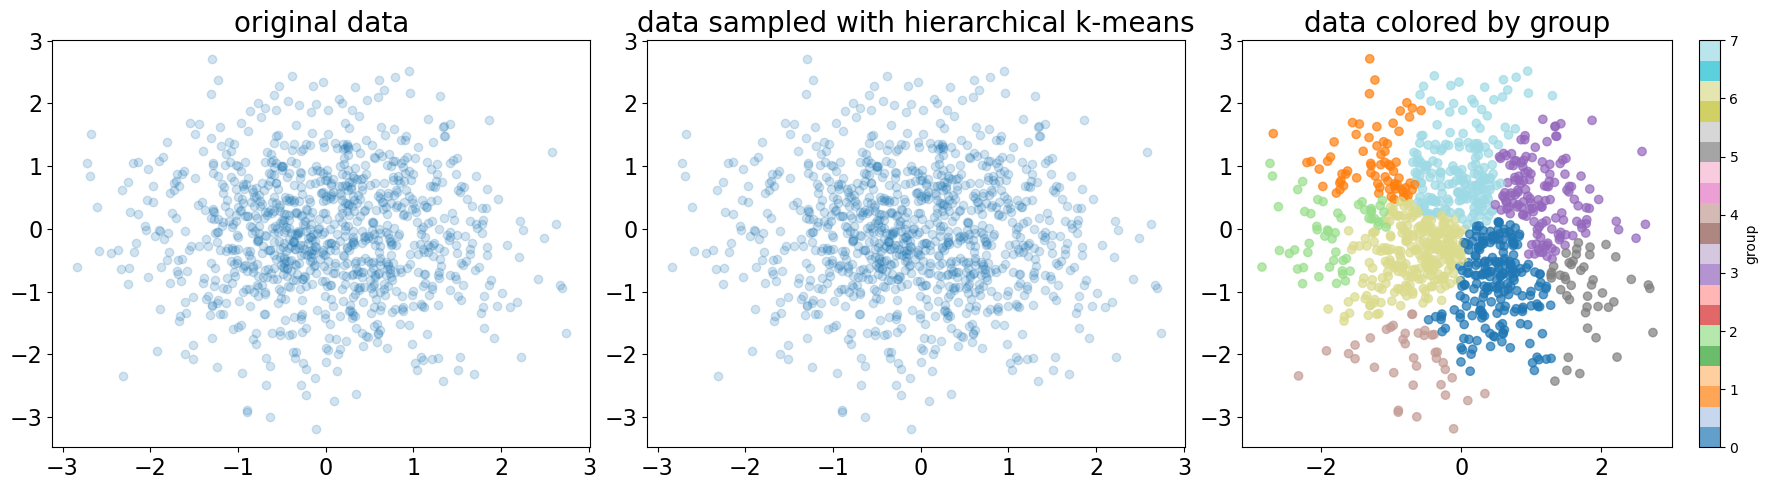

In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from src.datamodule.datacuration import (
  HierarchicalCluster,
  hierarchical_kmeans_gpu as hkmg,
  hierarchical_sampling,
  group_number
)

def make_ring(n, rmin, rmax):
    r = np.random.rand(n) * (rmax - rmin) + rmin
    alpha = np.random.rand(n) * 2 * np.pi
    return np.vstack([r * np.cos(alpha), r * np.sin(alpha)]).T

# data = np.concatenate([
#     make_ring(20000, 0.7, 1.0) + np.array([-2.2, 1.]),
#     make_ring(200, 0.7, 1.0) + np.array([0., 1.]),
#     make_ring(1000, 0.7, 1.0) + np.array([2.2, 1.]),
#     make_ring(500, 0.7, 1.0) + np.array([-1.2, 0.2]),
#     make_ring(8000, 0.7, 1.0) + np.array([1.2, 0.2]),
# ])

data = np.random.randn(1000, 2)

clusters = hkmg.hierarchical_kmeans_with_resampling(
  data=torch.tensor(data, device="cuda", dtype=torch.float32),
  n_clusters=[100, 8],
  n_levels=2,
  sample_sizes=[8, 2],
  verbose=False,
)

cl = HierarchicalCluster.from_dict(clusters)
sampled_indices = hierarchical_sampling(cl, target_size=1000)
sampled_points = data[sampled_indices]
print(sampled_points.shape)

groups = group_number(clusters)

figh, figw = 1, 3  # Changed to add a third subplot
fig, axs = plt.subplots(figh, figw, figsize=(6 * figw, 5 * figh))
axs[0].scatter(data[:, 0], data[:, 1], alpha=0.2)
axs[0].set_title("original data", fontsize=20)
axs[0].tick_params(labelsize=16)
axs[1].scatter(sampled_points[:, 0], sampled_points[:, 1], alpha=0.2)
axs[1].set_title("data sampled with hierarchical k-means", fontsize=20)
axs[1].tick_params(labelsize=16)

# Third plot: color by group
scatter = axs[2].scatter(data[:, 0], data[:, 1], c=groups, cmap='tab20', alpha=0.7)
axs[2].set_title("data colored by group", fontsize=20)
axs[2].tick_params(labelsize=16)
plt.colorbar(scatter, ax=axs[2], label="group")

plt.tight_layout()
plt.show()

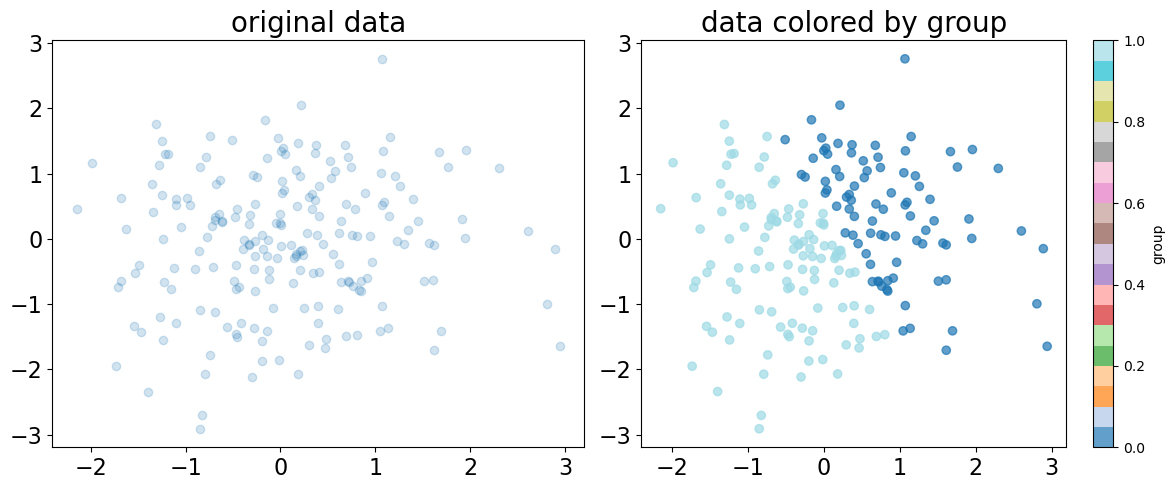

In [ ]:
data = np.random.randn(200, 2)

clusters = hkmg.hierarchical_kmeans(
  data=torch.tensor(data, device="cuda", dtype=torch.float32),
  n_clusters=[100, 2],
  n_levels=2,
  verbose=False,
)

groups = group_number(clusters)

figh, figw = 1, 2 # Changed to add a third subplot
fig, axs = plt.subplots(figh, figw, figsize=(6 * figw, 5 * figh))
axs[0].scatter(data[:, 0], data[:, 1], alpha=0.2)
axs[0].set_title("original data", fontsize=20)
axs[0].tick_params(labelsize=16)

# Third plot: color by group
scatter = axs[1].scatter(data[:, 0], data[:, 1], c=groups, cmap='tab20', alpha=0.7)
axs[1].set_title("data colored by group", fontsize=20)
axs[1].tick_params(labelsize=16)
plt.colorbar(scatter, ax=axs[1], label="group")

plt.tight_layout()
plt.show()

# Embeddings

In [5]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
embeddings_tsne = torch.load('/scratch/unifesp/fairmi/dilermando.queiroz/fairmi-framework/output/embeddings/chexpert/chexpert_raddino_tsne.pt')
embeddings_tsne2 = torch.load('/scratch/unifesp/fairmi/dilermando.queiroz/fairmi-framework/output/embeddings/chexpert/chexpert_dino-base_tsne.pt')

/tmp/ipykernel_1371435/988079490.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_tsne = torch.load('/scratch/unifesp/fairmi/dilermando.queiroz/fairmi-framewor

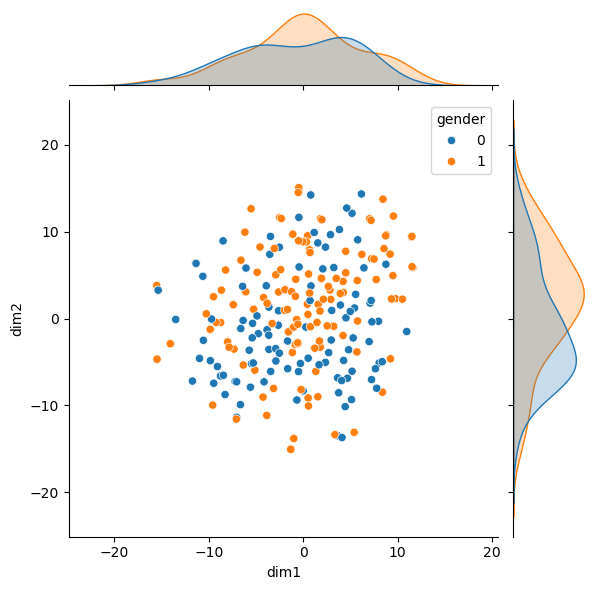

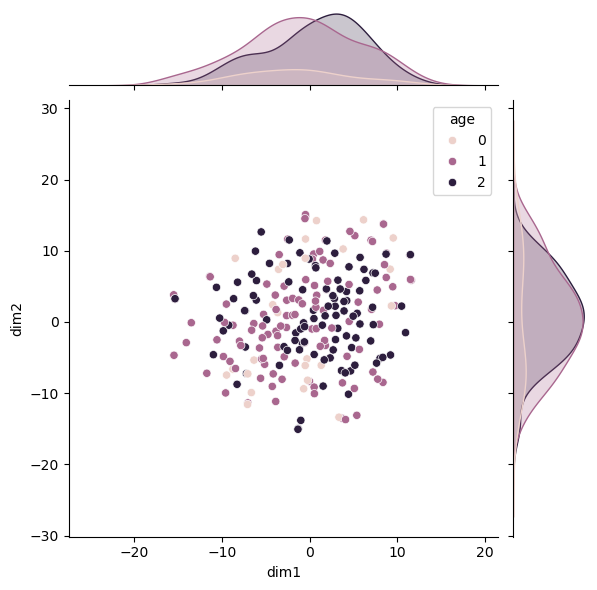

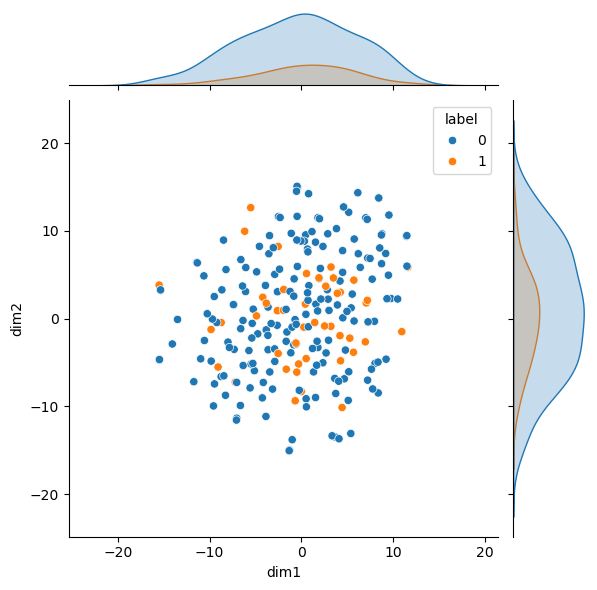

In [17]:
# Prepare data as a DataFrame with columns for tsne coordinates and gender label
df = pd.DataFrame({
    'dim1': embeddings_tsne['tsne_embeddings'][:, 0],
    'dim2': embeddings_tsne['tsne_embeddings'][:, 1],
    'gender': embeddings_tsne['gender'],
    'age': embeddings_tsne['age'],
    'label': embeddings_tsne['label'],
})

# Plot with jointplot using KDE and hue for gender
sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='gender',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='age',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='label',
    kind='scatter',
)

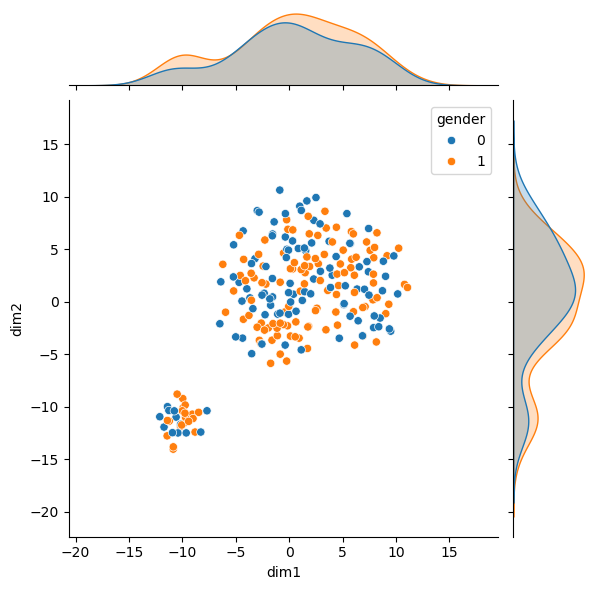

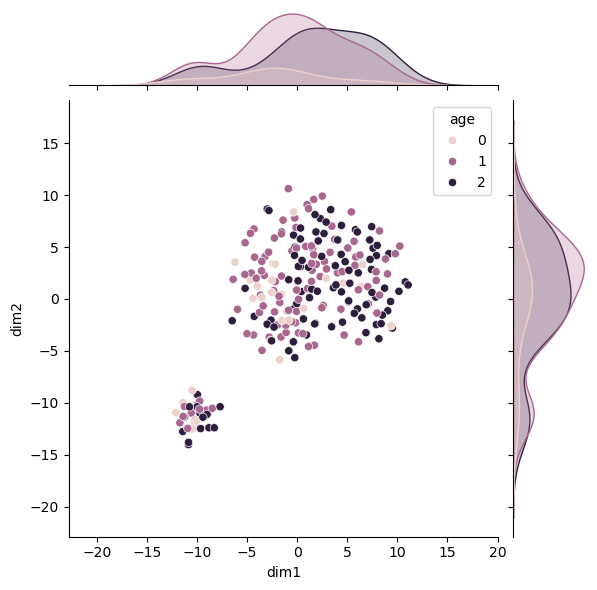

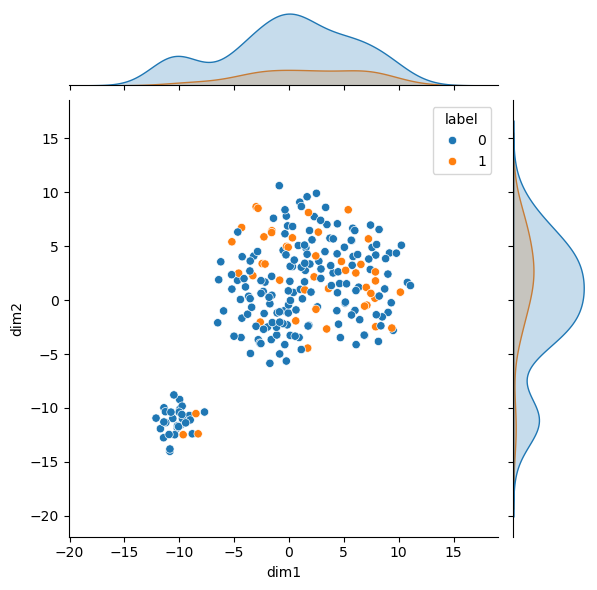

In [18]:
# Prepare data as a DataFrame with columns for tsne coordinates and gender label
df = pd.DataFrame({
    'dim1': embeddings_tsne2['tsne_embeddings'][:, 0],
    'dim2': embeddings_tsne2['tsne_embeddings'][:, 1],
    'gender': embeddings_tsne2['gender'],
    'age': embeddings_tsne2['age'],
    'label': embeddings_tsne2['label'],
})

# Plot with jointplot using KDE and hue for gender
sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='gender',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='age',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='label',
    kind='scatter',
)

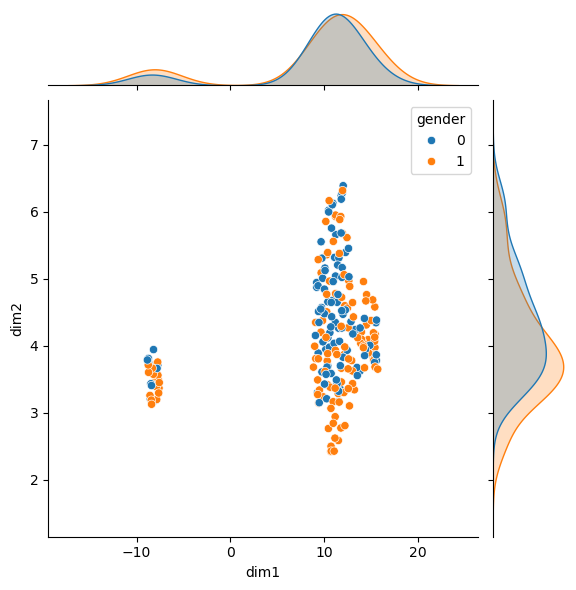

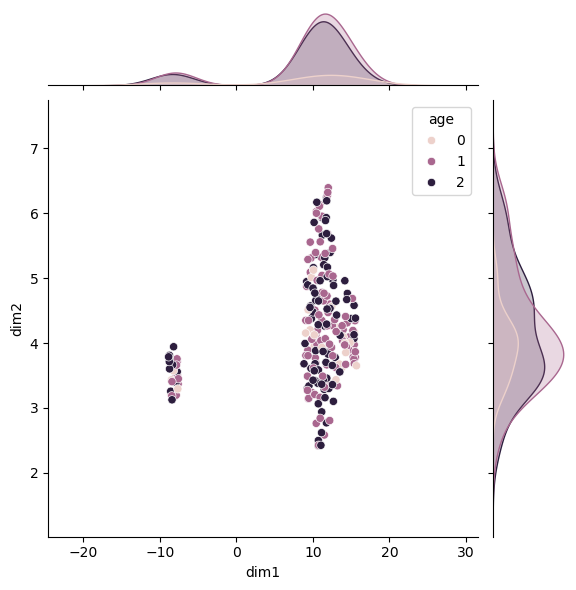

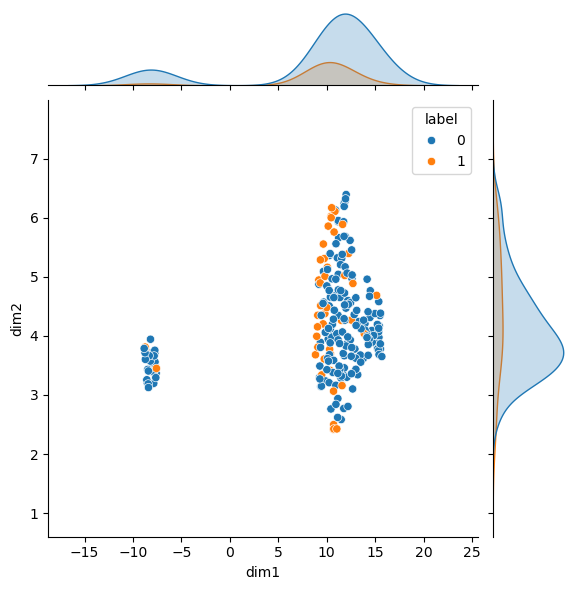

In [13]:
# Prepare data as a DataFrame with columns for tsne coordinates and gender label
df = pd.DataFrame({
    'dim1': embeddings_clip_umap['umap_embeddings'][:, 0],
    'dim2': embeddings_clip_umap['umap_embeddings'][:, 1],
    'gender': embeddings_clip_umap['gender'],
    'age': embeddings_clip_umap['age'],
    'label': embeddings_clip_umap['label'],
})

# Plot with jointplot using KDE and hue for gender
sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='gender',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='age',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='label',
    kind='scatter',
)

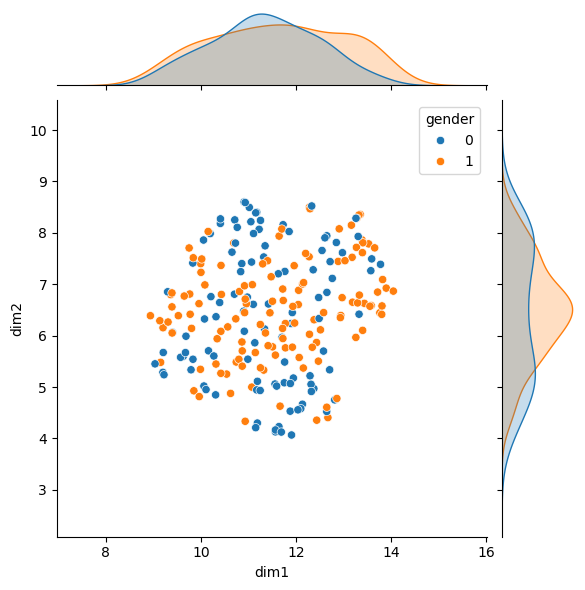

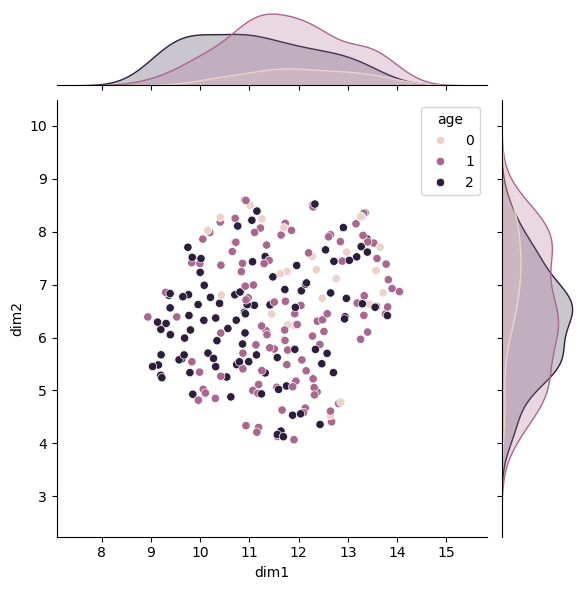

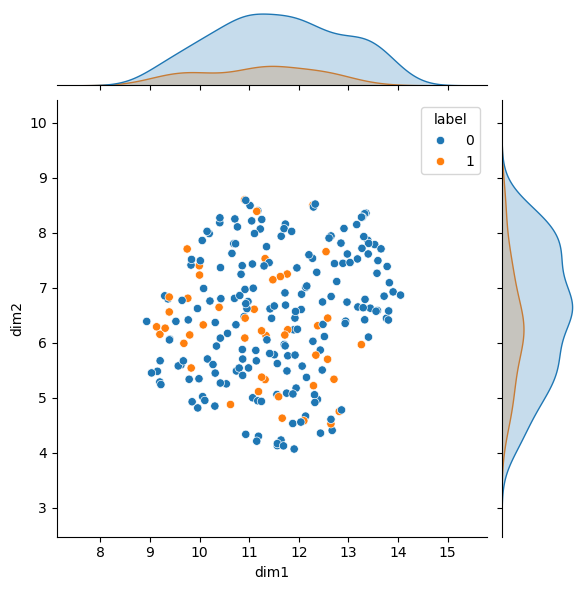

In [9]:
# Prepare data as a DataFrame with columns for tsne coordinates and gender label
df = pd.DataFrame({
    'dim1': embeddings_umap['umap_embeddings'][:, 0],
    'dim2': embeddings_umap['umap_embeddings'][:, 1],
    'gender': embeddings_umap['gender'],
    'age': embeddings_umap['age'],
    'label': embeddings_umap['label'],
})

# Plot with jointplot using KDE and hue for gender
sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='gender',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='age',
    kind='scatter',
)

sns.jointplot(
    data=df,
    x='dim1',
    y='dim2',
    hue='label',
    kind='scatter',
)

/tmp/ipykernel_1368167/956094179.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data=torch.tensor(data, device="cuda", dtype=torch.float32),


Hierarchical sampling from clusters: 100%|██████████| 4/4 [00:00<00:00, 8081.51it/s]
torch.Size([234, 2])


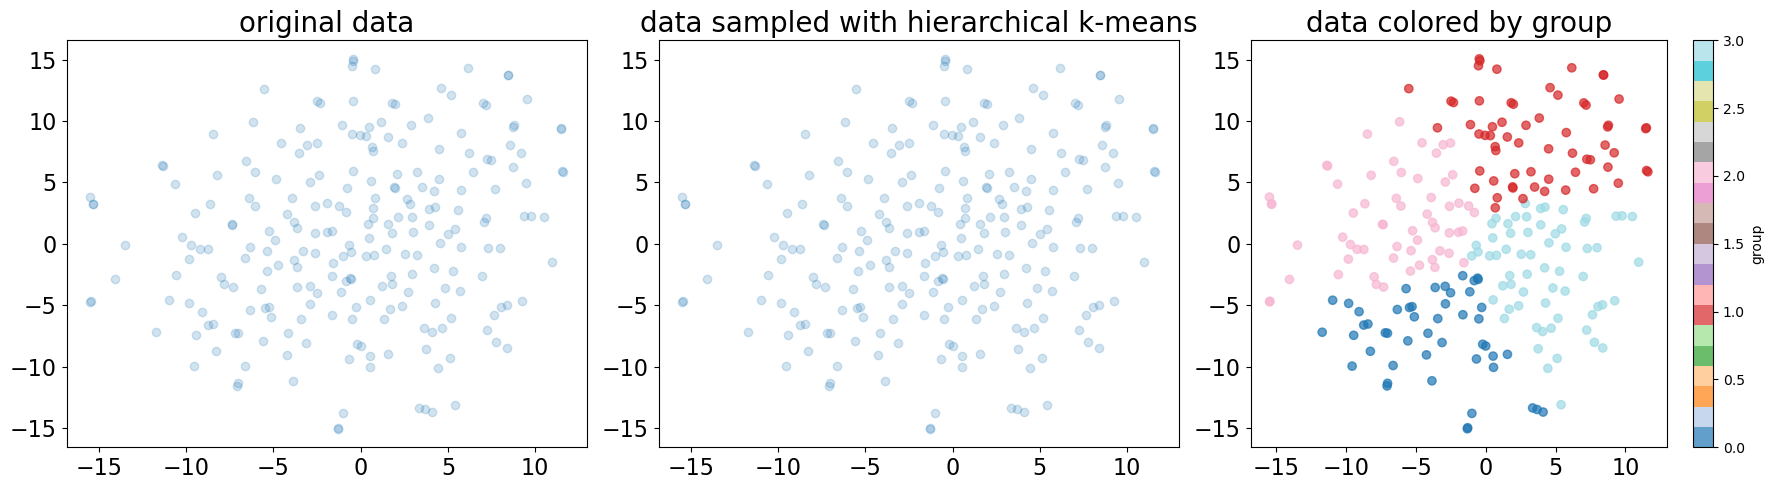

In [5]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from src.datamodule.datacuration import (
  HierarchicalCluster,
  hierarchical_kmeans_gpu as hkmg,
  hierarchical_sampling,
  group_number
)

def make_ring(n, rmin, rmax):
    r = np.random.rand(n) * (rmax - rmin) + rmin
    alpha = np.random.rand(n) * 2 * np.pi
    return np.vstack([r * np.cos(alpha), r * np.sin(alpha)]).T

data = embeddings_tsne['tsne_embeddings']

clusters = hkmg.hierarchical_kmeans_with_resampling(
  data=torch.tensor(data, device="cuda", dtype=torch.float32),
  n_clusters=[100, 4],
  n_levels=2,
  sample_sizes=[8, 2],
  verbose=False,
)

cl = HierarchicalCluster.from_dict(clusters)
sampled_indices = hierarchical_sampling(cl, target_size=1000)
sampled_points = data[sampled_indices]
print(sampled_points.shape)

groups = group_number(clusters)

figh, figw = 1, 3  # Changed to add a third subplot
fig, axs = plt.subplots(figh, figw, figsize=(6 * figw, 5 * figh))
axs[0].scatter(data[:, 0], data[:, 1], alpha=0.2)
axs[0].set_title("original data", fontsize=20)
axs[0].tick_params(labelsize=16)
axs[1].scatter(sampled_points[:, 0], sampled_points[:, 1], alpha=0.2)
axs[1].set_title("data sampled with hierarchical k-means", fontsize=20)
axs[1].tick_params(labelsize=16)

# Third plot: color by group
scatter = axs[2].scatter(data[:, 0], data[:, 1], c=groups, cmap='tab20', alpha=0.7)
axs[2].set_title("data colored by group", fontsize=20)
axs[2].tick_params(labelsize=16)
plt.colorbar(scatter, ax=axs[2], label="group")

plt.tight_layout()
plt.show()

# Groups

In [10]:
groups = np.load('/scratch/unifesp/fairmi/dilermando.queiroz/fairmi-framework/output/embeddings/chexpert/groups_chexpert_raddino_embeddings.npy', allow_pickle=True)

In [11]:
groups

array({2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 4: array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Test

In [1]:
import os
import torch
# from cuml import TSNE
from sklearn.manifold import TSNE
from src.model.extractor.embeddings import EmbeddingsExtractorModule
from src.datamodule.dataset.chest import CheXpertModule
from src.datamodule.dataset.natural import CelebAModule
from src.datamodule.dataset.skin import Ham10000Module
from src.projects.group_similarity import config

DATASET_MODULES = {
    "chexpert": CheXpertModule,
    # "ham10000": Ham10000Module,
    # "celeba": CelebAModule
}

def load_embeddings(path):
    return torch.load(path)

def save_embeddings(path, data):
    torch.save(data, path)

def compute_infotsne(embeddings, n_components=2):
    info_tsne = TSNE(n_components=n_components, random_state=42)
    info_tsne_emb = info_tsne.fit_transform(embeddings)
    return torch.tensor(info_tsne_emb)

def extract_embeddings(extractor, datamodule):
    all_data = {} # Initialize as empty dictionary
    for batch in datamodule.test_dataloader():
        with torch.no_grad():
            extracted_embeddings = extractor(batch)
            
            # Initialize 'embeddings' key if it doesn't exist
            if 'embeddings' not in all_data:
                all_data['embeddings'] = []
            all_data['embeddings'].append(extracted_embeddings)

            for key, value in batch.items():
                if key == 'image':
                    continue
                if key == 'group':
                    for group_key, group_value in value.items():
                        # Ensure group_key is initialized
                        if group_key not in all_data:
                            all_data[group_key] = []
                        all_data[group_key].append(group_value.cpu())
                    continue    
                # Ensure other batch keys are initialized
                if key not in all_data:
                    all_data[key] = []
                all_data[key].append(value.cpu())

    for key in all_data:
        all_data[key] = torch.cat(all_data[key])
    return all_data

def process_dataset(dataset_name, extractor, dimmensions):
    output_dir = f"output/embeddings/{dataset_name}"
    os.makedirs(output_dir, exist_ok=True)

    model = config['model']['name']
    embeddings_path = os.path.join(output_dir, f'{dataset_name}_{model}_embeddings.pt')

    if os.path.exists(embeddings_path):
        print(f"Loading embeddings for {dataset_name}, computing missing embeddings...")
        all_extracted_data = load_embeddings(embeddings_path)
    else:
        print(f"Extracting embeddings for {dataset_name}...")
        datamodule_class = DATASET_MODULES[dataset_name]
        datamodule = datamodule_class(
            data_dir=config['data'][dataset_name]['data_path'],
            image_data_dir=config['data'][dataset_name]['image_data_path'],
            batch_size=config['training']['batch_size'],
            model_transform=extractor.transforms,
            augment_train=False,
            fraction=config['training']['fraction'],
            num_workers=config['data'][dataset_name]['num_workers'],
            task=config['data'][dataset_name]['task'],
            num_groups=config['data'][dataset_name]['num_groups']
        )
        datamodule.setup(stage='test')
        all_extracted_data = extract_embeddings(extractor, datamodule)
        save_embeddings(embeddings_path, all_extracted_data)

    for n_components in dimmensions:
        if all_extracted_data.get(n_components):
            print(f"Skipping {dataset_name}: embeddings for n_components={n_components} found.")
        else:
            embeddings_n_components = compute_infotsne(all_extracted_data['embeddings'], n_components=n_components)
            all_extracted_data[n_components] = embeddings_n_components

def main():
    model = config['model']['name']
    model_id = config['model'][model]['id']
    weights_path = config['model'][model]['weights_path']
    type = config['model'][model]['type']
    extractor = EmbeddingsExtractorModule(model_id=model_id, pretrained=True, weights_path=weights_path, type=type)

    for dataset_name in DATASET_MODULES:
        process_dataset(dataset_name, extractor, dimmensions=config['groups']['embeddings_dimmension'])

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'torch'

In [1]:
import torch